##  双尾交互项的潜变量调节分析

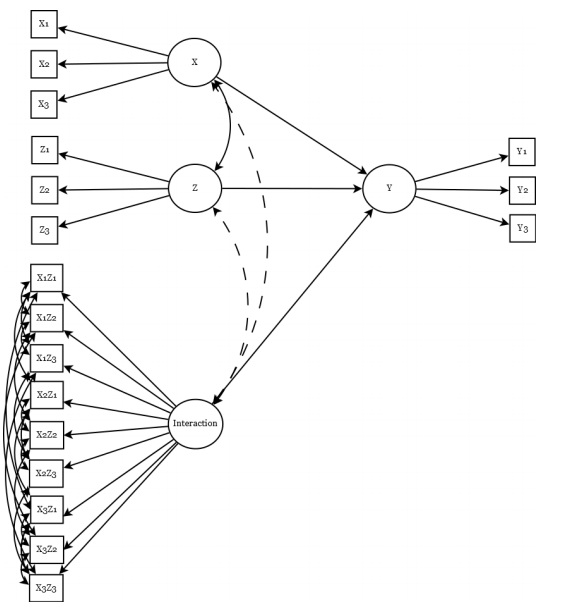

#### lavaan 中应用此模型

In [35]:
# 首先我们载入数据
BASE <- readxl::read_excel("C:/Users/77387/Desktop/Data_analysis_courses/R语言与结构方程模型/data/data_la_mod.xlsx")
head(BASE)

x1,x2,x3,z1,z2,z3,y1,y2,y3,w1,w2
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
3,6,6,7,4,4,2,2,5,3,4
2,4,6,5,3,5,6,3,2,5,2
1,6,6,6,4,6,2,2,6,2,2
2,NA,4,6,3,7,5,6,6,1,4
3,2,6,2,2,2,6,5,6,2,4
2,2,5,5,4,5,2,2,4,4,2


#### 两种方法，对潜变量交互项中心化处理

参考文献：Schoemann, A. M., & Jorgensen, T. D. (2021). Testing and interpreting latent variable interactions using the semTools package. Psych, 3(3), 322-335.

In [13]:
library(semTools)
# 乘积后再执行中心化（Double Mean Centered ），推荐！
BASE <- indProd ( BASE , var1 = c("x1" , "x2" , "x3") ,
                    var2 = c( "z1" , "z2" , "z3"),
                    match = FALSE , meanC = FALSE ,
                    residualC = FALSE , doubleMC = TRUE )
head(BASE)

,x1,x2,x3,z1,z2,z3,y1,y2,y3,x1.z1,x1.z2,x1.z3,x2.z1,x2.z2,x2.z3,x3.z1,x3.z2,x3.z3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6,6,7,4,4,2,2,5,9.01886792,0.655303,0.3320755,20.916667,4.04943,3.4166667,9.825095,-6.59542,-7.334601
2,2,4,6,5,3,5,6,3,2,-1.98113208,-5.344697,-1.6679245,-1.083333,-7.95057,-0.5833333,-2.174905,-12.59542,-1.334601
3,1,6,6,6,4,6,2,2,6,-5.98113208,-7.344697,-5.6679245,14.916667,4.04943,15.4166667,3.825095,-6.59542,4.665399
4,2,NA,4,6,3,7,5,6,6,0.01886792,-5.344697,2.3320755,NA,NA,NA,-8.174905,-18.59542,-3.334601
5,3,2,6,2,2,2,6,5,6,-5.98113208,-5.344697,-5.6679245,-17.083333,-15.95057,-16.5833333,-20.174905,-18.59542,-19.334601
6,2,2,5,5,4,5,2,2,4,-1.98113208,-3.344697,-1.6679245,-11.083333,-11.95057,-10.5833333,-7.174905,-10.59542,-6.334601


In [14]:
# 乘积前均值中心化（mean centered），不推荐！
head(indProd ( BASE , var1 = c("x1" , "x2" , "x3") ,
                    var2 = c( "z1" , "z2" , "z3"),
                    match = FALSE , meanC = TRUE ,
                    residualC = FALSE , doubleMC = FALSE ))

,x1,x2,x3,z1,z2,z3,y1,y2,y3,x1.z1,...,x3.z3,x1.z1.1,x1.z2.1,x1.z3.1,x2.z1.1,x2.z2.1,x2.z3.1,x3.z1.1,x3.z2.1,x3.z3.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6,6,7,4,4,2,2,5,9.01886792,...,-7.334601,1.07362746,-1.1591479,-1.2733721,2.9734140,-3.2102630,-3.5266073,0.4769583,-0.5149506,-0.5656947
2,2,4,6,5,3,5,6,3,2,-1.98113208,...,-1.334601,0.12137892,0.4152996,0.0933182,-0.2039445,-0.6977987,-0.1567960,-0.2578902,-0.8823749,-0.1982704
3,1,6,6,6,4,6,2,2,6,-5.98113208,...,4.665399,-0.34966662,1.6438824,-0.5399915,0.6828480,-3.2102630,1.0545247,0.1095340,-0.5149506,0.1691538
4,2,NA,4,6,3,7,5,6,6,0.01886792,...,-3.334601,-0.05155341,0.4152996,-0.2525465,NA,NA,NA,-0.4866924,3.9206554,-2.3841767
5,3,2,6,2,2,2,6,5,6,-5.98113208,...,-19.334601,-3.06171088,-2.8132832,-2.9275074,6.3281310,5.8146655,6.0507512,-1.3601630,-1.2497991,-1.3005432
6,2,2,5,5,4,5,2,2,4,-1.98113208,...,-6.334601,0.12137892,0.2423673,0.0933182,1.1998291,2.3957976,0.9224493,0.4439966,0.8865645,0.3413522


In [15]:
# 乘积前残差中心化（residual centered），不推荐
head(indProd ( BASE , var1 = c("x1" , "x2" , "x3") ,
                    var2 = c( "z1" , "z2" , "z3"),
                    match = FALSE , meanC = FALSE ,
                    residualC = TRUE , doubleMC = FALSE ))

,x1,x2,x3,z1,z2,z3,y1,y2,y3,x1.z1,...,x3.z3,x1.z1.1,x1.z2.1,x1.z3.1,x2.z1.1,x2.z2.1,x2.z3.1,x3.z1.1,x3.z2.1,x3.z3.1
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6,6,7,4,4,2,2,5,9.01886792,...,-7.334601,0.9900718,-0.5133741,-0.6002375,2.1763933,-2.75199084,-3.808163,0.25970939,-0.8451116,-1.1960470
2,2,4,6,5,3,5,6,3,2,-1.98113208,...,-1.334601,0.3265074,0.9958615,0.6086607,-0.3415814,-0.03931285,-0.210159,-0.38005238,-1.0992086,-0.1405776
3,1,6,6,6,4,6,2,2,6,-5.98113208,...,4.665399,-0.6101905,1.6959567,-0.2289417,0.4683006,-2.22351281,1.045373,0.06475786,-0.5767223,0.1214367
4,2,NA,4,6,3,7,5,6,6,0.01886792,...,-3.334601,12.0000000,6.0000000,14.0000000,NA,NA,NA,24.00000000,12.0000000,28.0000000
5,3,2,6,2,2,2,6,5,6,-5.98113208,...,-19.334601,-2.0044743,-1.8546222,-2.4193247,6.9323912,5.70324696,5.520973,-1.39871925,-1.5669836,-1.3380942
6,2,2,5,5,4,5,2,2,4,-1.98113208,...,-6.334601,0.6265583,1.1605518,0.7505475,1.3512842,2.82232166,1.201742,0.16947075,0.1987362,-0.1109359


In [27]:
# 定义模型
mod <- "
    ## 定义潜变量
    x =~ x1 + x2 + x3
    z =~ z1 + z2 + z3
    y =~ y1 + y2 + y3
    xz =~ x1 . z1 + x1 . z2 + x1 . z3 +
    x2 . z1 + x2 . z2 + x2 . z3 +
    x3 . z1 + x3 . z2 + x3 . z3
    ## 定义路径模型
    y ~ x + z + xz
    ## 潜变量交互项所有条目设置covariance
    x1 . z1 ~~  x1 . z2 +  x1 . z3
    x1 . z2 ~~  x1 . z3
    x2 . z1 ~~  x2 . z2 +  x2 . z3
    x2 . z2 ~~  x3 . z3
    x3 . z1 ~~  x3 . z2 +  x3 . z3
    x3 . z2 ~~  x3 . z3
    x1 . z1 ~~  x2 . z1 +  x3 . z1
    x2 . z1 ~~  x3 . z1
    x1 . z2 ~~  x2 . z2 +  x3 . z3
    x2 . z2 ~~  x3 . z2
    x1 . z3 ~~  x2 . z3 +  x3 . z3
    x2 . z3 ~~  x3 . z3
"

In [28]:
# 估计模型
BASE_fit <- sem ( mod , data = BASE , 
                  std.lv = TRUE ,
                  meanstructure = TRUE )
# meanstructure =  TRUE 获取均值结构参数，是后边做简单斜率分析更方便

Warning message in lav_object_post_check(object):
"lavaan WARNING: covariance matrix of latent variables
                is not positive definite;
                use lavInspect(fit, "cov.lv") to investigate."


In [30]:
lavInspect(BASE_fit, "cov.lv")

,x,z,y,xz
x,1.00000000,-0.07984688,0.05782204,1.5597693
z,-0.07984688,1.00000000,-0.22599626,0.4870748
y,0.05782204,-0.22599626,1.05065425,-0.1064214
xz,1.55976933,0.48707484,-0.10642137,1.0000000


In [29]:
summary(BASE_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE)

Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x   xz "


lhs,op,rhs,exo,est,se,z,pvalue,std.lv,std.all,std.nox
<chr>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
x,=~,x1,0,0.005056819,0.06857500,0.07374144,9.412161e-01,0.005056819,0.005014561,0.005014561
x,=~,x2,0,0.870658613,6.44626738,0.13506399,8.925613e-01,0.870658613,0.542286983,0.542286983
x,=~,x3,0,-0.001714225,0.02409871,-0.07113350,9.432915e-01,-0.001714225,-0.002183258,-0.002183258
z,=~,z1,0,0.560106812,0.07184879,7.79563300,6.439294e-15,0.560106812,0.460999287,0.460999287
z,=~,z2,0,1.448765212,0.06672186,21.71350174,0.000000e+00,1.448765212,0.988797064,0.988797064
z,=~,z3,0,0.914446644,0.08375421,10.91821759,0.000000e+00,0.914446644,0.615025961,0.615025961
y,=~,y1,0,0.928444156,0.16960758,5.47407221,4.398097e-08,0.951668508,0.555921310,0.555921310
y,=~,y2,0,1.610925994,0.27695683,5.81652372,6.008402e-09,1.651222130,0.918469546,0.918469546
y,=~,y3,0,-0.251826866,0.10332033,-2.43734080,1.479573e-02,-0.258126131,-0.170092004,-0.170092004


#### 简单斜率分析

使用probe2WayMC处理“乘积后再执行中心化”和“乘积前均值中心化”

使用probe2WayRC处理“乘积前残差中心化”

In [32]:
slotable <- probe2WayMC(BASE_fit,
           nameX=c("x" , "z" , "xz"),
           nameY="y",
           modVar="z",
           valProbe = c( -1,  1))
slotable

z,est,se,z,pvalue
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
-1,-0.04697540,0.37460546,-0.1253997,0.9002072
1,0.01972471,0.07782151,0.2534609,0.7999121


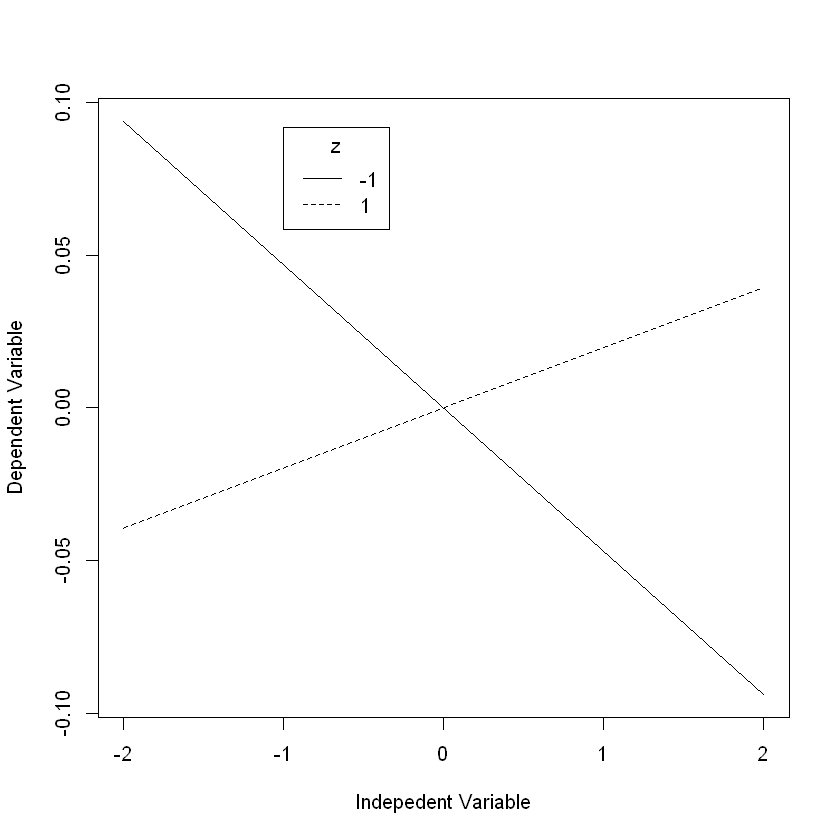

In [34]:
plotProbe(slotable,xlim=c(-2,2))

## 三尾交互项的潜变量调节分析(慎重！！！)

新加入一个调节变量w，假设我们认为z和y的交互作用被w调节

In [52]:
# 生成三维交互项
BASE2 <- indProd (  BASE , 
                    var1 = c("x1" , "x2" , "x3") ,
                    var2 = c( "z1" , "z2" , "z3"),
                    var3 = c( "w1","w2"),
                    match = FALSE , meanC = TRUE ,
                    residualC = FALSE , doubleMC = TRUE )
head(BASE2)

,x1,x2,x3,z1,z2,z3,y1,y2,y3,w1,...,x2.z2.w1,x2.z2.w2,x2.z3.w1,x2.z3.w2,x3.z1.w1,x3.z1.w2,x3.z2.w1,x3.z2.w2,x3.z3.w1,x3.z3.w2
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,3,6,6,7,4,4,2,2,5,3,...,1.0718028,-5.27880051,0.9753821,-5.7447963,-0.2342846,0.90597278,-0.01887986,-0.6428070,-0.123435367,-0.68243845
2,2,4,6,5,3,5,6,3,2,5,...,-0.9471881,0.08384581,-0.1743286,-0.1104495,-0.5677342,0.26146614,-1.69246422,0.5417992,-0.611141661,0.29424597
3,1,6,6,6,4,6,2,2,6,2,...,4.2820658,1.14172550,-1.2158145,-0.6204793,-0.2526532,0.10676120,0.49607078,0.3870943,-0.474919996,0.13954102
4,2,NA,4,6,3,7,5,6,6,1,...,NA,NA,NA,NA,0.9782015,-0.61558089,-8.96075461,6.3607815,5.096120276,-3.55372581
5,3,2,6,2,2,2,6,5,6,2,...,-6.9821307,8.97108664,-7.4517062,9.3773487,1.5817054,-1.99474492,1.41325009,-1.8030941,1.359438628,-1.84272554
6,2,2,5,5,4,5,2,2,4,4,...,2.0766229,-1.21872107,0.7939301,-0.5648686,0.2178904,-0.03406514,0.51994029,-0.2030174,-0.007139911,0.06703643


In [53]:
# 定义模型
mod2 <- "
    ## 定义潜变量
    x =~ x1 + x2 + x3
    z =~ z1 + z2 + z3
    y =~ y1 + y2 + y3
    xzw =~ x1.z1.w1 + x1.z1.w2 + x1.z2.w1 + x1.z2.w2 + 
           x1.z3.w1 + x1.z3.w2 + x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    ## 定义路径模型
    y ~ x + z + xzw
    ## 潜变量交互项所有条目设置covariance
    x1.z1.w1 ~~ x1.z1.w2 + x1.z2.w1 + x1.z2.w2 + 
           x1.z3.w1 + x1.z3.w2 + x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x1.z1.w2 ~~ x1.z2.w1 + x1.z2.w2 + 
           x1.z3.w1 + x1.z3.w2 + x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x1.z2.w1 ~~ x1.z2.w2 + 
           x1.z3.w1 + x1.z3.w2 + x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x1.z2.w2 ~~ x1.z3.w1 + x1.z3.w2 + x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x1.z3.w1 ~~ x1.z3.w2 + x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x1.z3.w2 ~~ x2.z1.w1 + x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x2.z1.w1 ~~ x2.z1.w2 + 
           x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x2.z1.w2 ~~ x2.z2.w1 + x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x2.z2.w1 ~~ x2.z2.w2 + x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x2.z2.w2 ~~ x2.z3.w1 + x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x2.z3.w1 ~~ x2.z3.w2 +
           x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x2.z3.w2 ~~ x3.z1.w1 + x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x3.z1.w1 ~~ x3.z1.w2 + x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x3.z1.w2 ~~ x3.z2.w1 + x3.z2.w2 + 
           x3.z3.w1 + x3.z3.w2
    x3.z2.w1 ~~ x3.z2.w2 + x3.z3.w1 + x3.z3.w2
    x3.z2.w2 ~~ x3.z3.w1 + x3.z3.w2
    x3.z3.w1 ~~ x3.z3.w2
"

In [54]:
# 估计模型
BASE2_fit <- sem ( mod2 , data = BASE2 , 
                  std.lv = TRUE ,
                  meanstructure = TRUE )

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = lavsamplestats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."
Warning message in lav_object_post_check(object):
"lavaan WARNING: some estimated ov variances are negative"


In [55]:
# 提取统计数据
summary(BASE2_fit,
         fit.measures = TRUE, 
         standardized = TRUE,
         modindices = TRUE)

Warning message in sqrt(var.lhs.value * var.rhs.value):
"产生了NaNs"
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply NaN for a correlation value;
                  variables involved are: x1.z1.w1 x2.z1.w1"
Warning message in sqrt(var.lhs.value * var.rhs.value):
"产生了NaNs"
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply NaN for a correlation value;
                  variables involved are: x1.z1.w1 x2.z2.w1"
Warning message in sqrt(var.lhs.value * var.rhs.value):
"产生了NaNs"
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply NaN for a correlation value;
                  variables involved are: x1.z1.w1 x2.z2.w2"
Warning message in sqrt(var.lhs.value * var.rhs.value):
"产生了NaNs"
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: star

Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x1.z3.w2   x3.z1.w2 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x1.z3.w2   x3.z2.w1 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x1.z3.w2   x3.z2.w2 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x1.z3.w2   x3.z3.w1 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation l

Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x2.z2.w2   x3.z3.w1 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x2.z2.w2   x3.z3.w2 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x2.z3.w1   x2.z3.w2 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation larger than 1;
                   variables involved are:  x2.z3.w1   x3.z1.w1 "
Warning message in lav_start_check_cov(lavpartable = lavpartable, start = START):
"lavaan WARNING: starting values imply a correlation l

ERROR: Error in modificationIndices(object, standardized = TRUE, cov.std = cov.std): lavaan ERROR: could not compute modification indices; information matrix is singular


In [ ]:
#### 简单斜率分析

In [50]:
slotable2 <- probe3WayMC(BASE2_fit,
            nameX=c("x" , "z" ,"w" ,"xzw"),
            nameY="y",
            modVar=c("z","w"),
            valProbe1 = c(-1, 1),
            valProbe2 = c(-1, 1))
slotable2

Warning message in lav_model_vcov(lavmodel = lavmodel, lavsamplestats = object@SampleStats, :
"lavaan WARNING:
    Could not compute standard errors! The information matrix could
    not be inverted. This may be a symptom that the model is not
    identified."


ERROR: Error in `rownames<-`(`*tmp*`, value = lav_partable_labels(object@ParTable, : 不能给没有维度的对象设'rownames'
